#### 1.write ann code using mnist data for using both sequential and functional api way - done
#### 2.use tensorboard - done
#### 3.use call back functions - done
#### 4.use weights and bias (optional) - tensorboard is enough


### use all things learnt avoid overfiiting  (regularization)
    1.l1 and l2 regularization
    2.Data augmentation
    3.Dropout
    4.Earlystopping
    5.ensemble models
### for reduce  vanishing gradient
    1.Activation functions
    2.Batch normalization
    3.weight intialization

In [8]:
!pip install matplotlib==3.5.2

   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.2 MB 6.3 MB/s eta 0:00:01
   ---------- ----------------------------- 1.8/7.2 MB 5.3 MB/s eta 0:00:02
   -------------- ------------------------- 2.6/7.2 MB 4.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.4/7.2 MB 4.5 MB/s eta 0:00:01
   ----------------------- ---------------- 4.2/7.2 MB 4.3 MB/s eta 0:00:01
   --------------------------- ------------ 5.0/7.2 MB 4.3 MB/s eta 0:00:01
   -------------------------------- ------- 5.8/7.2 MB 4.2 MB/s eta 0:00:01
   ------------------------------------ --- 6.6/7.2 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 7.2/7.2 MB 4.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.2
    Uninstalling matplotlib-3.9.2:
      Successfully uninstalled matplotlib-3.9.2


  You can safely remove it manually.


In [1]:
# without gpu :
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import datasets,Input,layers,Sequential

#follow this for more- https://www.kaggle.com/code/kannannadars/ann-using-mnist-dataset

In [2]:
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Dataset preparation and preprocessing


In [3]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)


Actual value: 5


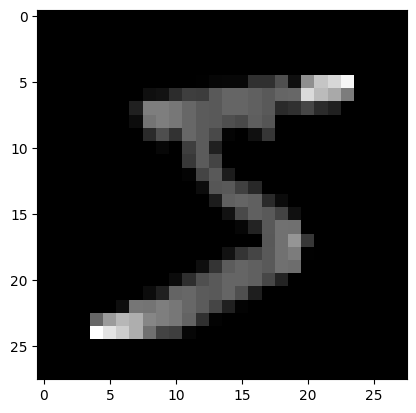

In [6]:
plt.imshow(x_train[0],cmap="gray")
print(f"Actual value: {y_train[0]}")

In [14]:
# #flatten
# x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
# x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0


# Model Architechture Setup

In [7]:
model=Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=128,activation='relu'),
    layers.Dense(units=10,activation='softmax')

])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [16]:
tensorboard_callback=keras.callbacks.TensorBoard(log_dir="logs",histogram_freq=1)


In [22]:
model_check_Point=keras.callbacks.ModelCheckpoint(filepath="logs/test_model.h5",monitor="accuracy",save_best_only=True)

In [20]:
early_stopping=keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)

In [23]:
model.fit(x_train,y_train,batch_size=32,epochs=2,callbacks=[tensorboard_callback,early_stopping,model_check_Point])
#wit out gpu=19s
#with gpu=9s

Epoch 1/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0099 - accuracy: 0.9967
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0068 - accuracy: 0.9979


In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9695


[0.09415845572948456, 0.9695000052452087]

In [15]:
prediction=model.predict(x_train)

1875/1875 [==============================] - 2s 842us/step


In [16]:
prediction[10]

array([4.8413934e-10, 2.3044884e-06, 2.0194436e-07, 9.9983406e-01,
       4.1453500e-08, 4.2841741e-05, 1.4385260e-11, 3.0419798e-08,
       2.8513884e-07, 1.2016569e-04], dtype=float32)

In [17]:
np.argmax(prediction[10])

3

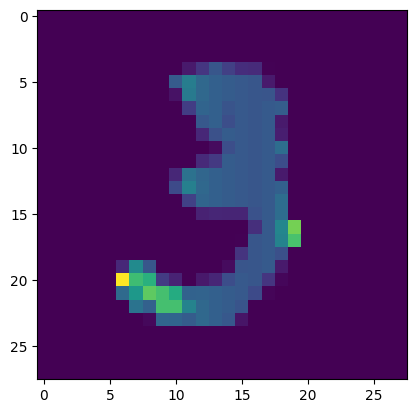

In [18]:
plt.imshow(x_train[10])

In [22]:
# Functional way
inputs=Input(shape=(28,28))
x=layers.Flatten()(inputs)

x=layers.Dense(units=512,activation='relu')(x)
y=layers.Dense(units=128,activation='relu')(x)
outputs=layers.Dense(units=10,activation='softmax')(y)
model2=keras.Model(inputs,outputs)

In [23]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [24]:
model2.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [25]:
model2.fit(x_train,y_train,batch_size=32,epochs=2)
#wit out gpu=19s
#with gpu=9s

Epoch 1/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2093 - accuracy: 0.9369
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0832 - accuracy: 0.9738
